In [76]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [77]:
df = pd.read_csv("Summer-Olympic-medals-1976-to-2008.csv", encoding='latin-1')

In [78]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


# Data Wrangling

In [80]:
df.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [81]:
df.shape

(15433, 11)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [83]:
df = df.dropna()

In [84]:
df.columns

Index(['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender',
       'Country_Code', 'Country', 'Event_gender', 'Medal'],
      dtype='object')

In [85]:
df['Gender'] = df['Gender'].replace({'Men':1,'Women':0})

C:\Users\Adnan\AppData\Local\Temp\ipykernel_28964\1605143678.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Men':1,'Women':0})


In [86]:
df.pivot_table(index = ['Medal'], aggfunc = 'size')

Medal
Bronze    5258
Gold      5042
Silver    5016
dtype: int64

In [87]:
df["City"].unique()

array(['Montreal', 'Moscow', 'Los Angeles', 'Seoul', 'Barcelona',
       'Atlanta', 'Sydney', 'Athens', 'Beijing'], dtype=object)

In [88]:
df["City"].nunique()

9

In [89]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",0,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",1,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",1,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",1,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",0,USA,United States,W,Bronze


In [90]:
df.describe(include = "all")

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
count,15316,15316.000000,15316,15316,15316,15316,15316.000000,15316,15316,15316,15316
unique,9,NaN,28,41,293,11337,NaN,128,127,3,3
top,Beijing,NaN,Aquatics,Athletics,hockey,"PHELPS, Michael",NaN,USA,United States,M,Bronze
freq,2042,NaN,2210,1523,817,16,NaN,1992,1992,8817,5258
mean,NaN,1993.620789,NaN,NaN,NaN,NaN,0.612954,NaN,NaN,NaN,NaN
std,NaN,10.159851,NaN,NaN,NaN,NaN,0.487090,NaN,NaN,NaN,NaN
min,NaN,1976.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,1984.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
50%,NaN,1996.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,2004.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


In [91]:
df = df.drop(['Country_Code'], axis = 1)

In [92]:
df = df.drop(['Event_gender'], axis = 1)

# EDA

<Axes: title={'center': 'Top 20 Countries by Medal Count'}, xlabel='Country', ylabel='Medals'>

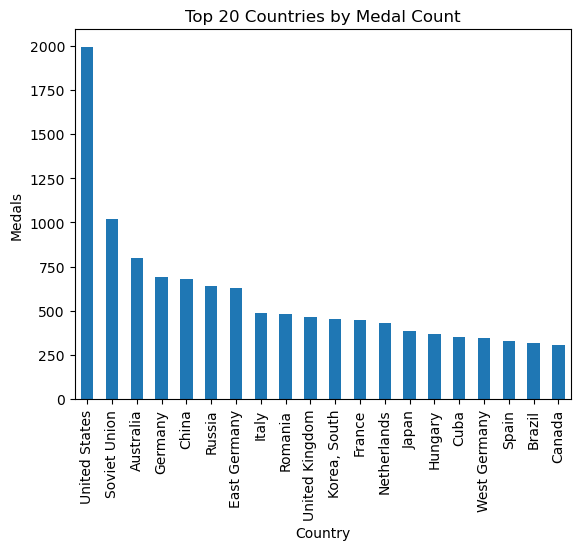

In [94]:
medals_by_country = df[df['Medal'].notnull()].groupby('Country')['Medal'].count().sort_values(ascending=False).head(20)
medals_by_country.plot(kind='bar', title='Top 20 Countries by Medal Count', ylabel='Medals')

In [95]:
medals_df = df[df['Medal'].notnull()]

# Get top 10 medal-winning players overall
top_athletes = medals_df['Athlete'].value_counts().head(10).index

In [96]:
# Filter the data for these athletes
top_df = medals_df[medals_df['Athlete'].isin(top_athletes)]

# Create a pivot table with medal types
pivot = top_df.pivot_table(index='Athlete', columns='Medal', values='Event', aggfunc='count', fill_value=0)

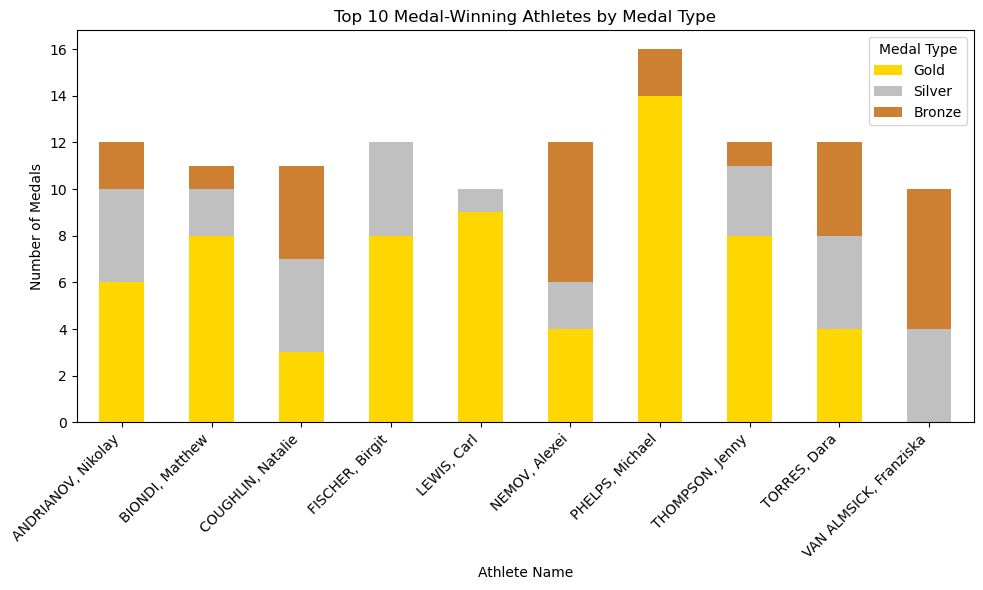

In [97]:
# Optional: reorder columns to Gold, Silver, Bronze
pivot = pivot[['Gold', 'Silver', 'Bronze']]

# Plot a stacked bar chart
pivot.plot(kind='bar', stacked=True, color=['gold', 'silver', '#cd7f32'], figsize=(10, 6))
plt.title('Top 10 Medal-Winning Athletes by Medal Type')
plt.xlabel('Athlete Name')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Medal Type')
plt.tight_layout()
plt.show()

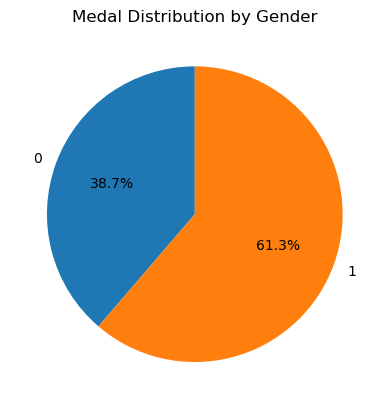

In [98]:
gender_medals = df[df['Medal'].notnull()].groupby('Gender')['Medal'].count()

gender_medals.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Medal Distribution by Gender')
plt.ylabel('')
plt.show()

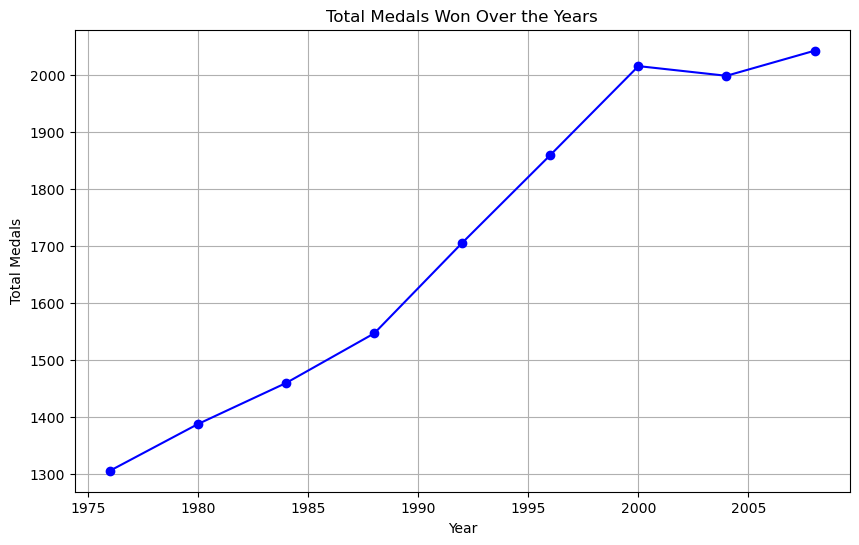

In [99]:
medals_over_years = df.groupby('Year')['Medal'].count()
# Plotting the trend of medals won over the years
plt.figure(figsize=(10, 6))
plt.plot(medals_over_years.index, medals_over_years.values,
marker='o', linestyle='-', color='b')
plt.title("Total Medals Won Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid(True)
plt.show()